In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Aug 25 02:20:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/gdrive/MyDrive/transfer_learning/
!ls

/content/gdrive/MyDrive/transfer_learning
'(20.10.25_속도비교 벤치마크 추가) TFRecord 생성 및 비교 예제.ipynb'
 인공지능실습2_전이학습_0812_1700.ipynb
 재원님_인공지능실습2_전이학습_0813_1000.ipynb
 인공지능실습2_전이학습_0813_1200.ipynb
 인공지능실습2_전이학습_0813_1300.ipynb
 인공지능실습2_전이학습_0814_1600.ipynb
 인공지능실습2_전이학습_0814_1900.ipynb
 인공지능실습2_전이학습_0814_2200.ipynb
 인공지능실습2_전이학습_0815_0230.ipynb
 인공지능실습2_전이학습_0815_1930.ipynb
 인공지능실습2_전이학습_0816_0230.ipynb
 인공지능실습2_전이학습_0816_1330.ipynb
 인공지능실습2_전이학습_0817_1400.ipynb
 인공지능실습2_전이학습_0818_1900.ipynb
'인공지능실습2_전이학습_0819_1500   splitfolders .ipynb'
 인공지능실습2_전이학습_0820_1100.ipynb
 data200_전이학습_0821_0800.ipynb
 data200_전이학습_0822_1930.ipynb
 data200_전이학습_0822_2350.ipynb
'data200_전이학습_0823_0

In [ ]:
from inception_resnet_v1_lcl import *

from functools import partial
from keras.models import Model
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Concatenate
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D, Flatten
from keras.layers import Input
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [ ]:
base_model = InceptionResNetV1(input_shape=(224, 224, 3))
                               #,dropout_keep_prob=0.7)

In [ ]:
base_model = InceptionResNetV1(weights_path='./facenet_keras_weights.h5',
                               input_shape=(224, 224, 3))
                               #,dropout_keep_prob=0.7)



In [ ]:
#tf.keras.applications. #에서 mobilenet / efficient net
#tensorflow hub (library) (pretrained weight 존재 x)
#prepatch : 미리 data를 가져와서

In [ ]:
for layer in base_model.layers[:]:
    layer.trainable = False
    
base_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 111, 111, 32) 96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 111, 111, 32) 0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 Conv2d_1a_3x3
2 Conv2d_1a_3x3_BatchNorm
3 Conv2d_1a_3x3_Activation
4 Conv2d_2a_3x3
5 Conv2d_2a_3x3_BatchNorm
6 Conv2d_2a_3x3_Activation
7 Conv2d_2b_3x3
8 Conv2d_2b_3x3_BatchNorm
9 Conv2d_2b_3x3_Activation
10 MaxPool_3a_3x3
11 Conv2d_3b_1x1
12 Conv2d_3b_1x1_BatchNorm
13 Conv2d_3b_1x1_Activation
14 Conv2d_4a_3x3
15 Conv2d_4a_3x3_BatchNorm
16 Conv2d_4a_3x3_Activation
17 Conv2d_4b_3x3
18 Conv2d_4b_3x3_BatchNorm
19 Conv2d_4b_3x3_Activation
20 Block35_1_Branch_2_Conv2d_0a_1x1
21 Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm
22 Block35_1_Branch_2_Conv2d_0a_1x1_Activation
23 Block35_1_Branch_1_Conv2d_0a_1x1
24 Block35_1_Branch_2_Conv2d_0b_3x3
25 Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm
26 Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm
27 Block35_1_Branch_1_Conv2d_0a_1x1_Activation
28 Block35_1_Branch_2_Conv2d_0b_3x3_Activation
29 Block35_1_Branch_0_Conv2d_1x1
30 Block35_1_Branch_1_Conv2d_0b_3x3
31 Block35_1_Branch_2_Conv2d_0c_3x3
32 Block35_1_Branch_0_Conv2d_1x1_BatchNorm
33 Block35_1_B

In [ ]:
classes = 60
epochs = 200
#epochs = 500
targetx = 224
targety = 224

#keras tuner : hyperparmeter tuning
#kernal initalizer도 여러가지 할 수 있음. (모델이 깊을 때는 )

x = base_model.get_layer(index=442).output
#x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
x = Dense(1024, activation='relu',  kernel_initializer='he_normal', bias_initializer='zeros')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
predictions = Dense(classes, activation='softmax')(x)

my_model = Model(inputs=base_model.input, outputs=predictions)

my_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 111, 111, 32) 96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 111, 111, 32) 0           Conv2d_1a_3x3_BatchNorm[0][0]    
______________________________________________________________________________________________

In [ ]:
for i, layer in enumerate(my_model.layers):
    print(i,layer.name)

0 input_2
1 Conv2d_1a_3x3
2 Conv2d_1a_3x3_BatchNorm
3 Conv2d_1a_3x3_Activation
4 Conv2d_2a_3x3
5 Conv2d_2a_3x3_BatchNorm
6 Conv2d_2a_3x3_Activation
7 Conv2d_2b_3x3
8 Conv2d_2b_3x3_BatchNorm
9 Conv2d_2b_3x3_Activation
10 MaxPool_3a_3x3
11 Conv2d_3b_1x1
12 Conv2d_3b_1x1_BatchNorm
13 Conv2d_3b_1x1_Activation
14 Conv2d_4a_3x3
15 Conv2d_4a_3x3_BatchNorm
16 Conv2d_4a_3x3_Activation
17 Conv2d_4b_3x3
18 Conv2d_4b_3x3_BatchNorm
19 Conv2d_4b_3x3_Activation
20 Block35_1_Branch_2_Conv2d_0a_1x1
21 Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm
22 Block35_1_Branch_2_Conv2d_0a_1x1_Activation
23 Block35_1_Branch_1_Conv2d_0a_1x1
24 Block35_1_Branch_2_Conv2d_0b_3x3
25 Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm
26 Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm
27 Block35_1_Branch_1_Conv2d_0a_1x1_Activation
28 Block35_1_Branch_2_Conv2d_0b_3x3_Activation
29 Block35_1_Branch_0_Conv2d_1x1
30 Block35_1_Branch_1_Conv2d_0b_3x3
31 Block35_1_Branch_2_Conv2d_0c_3x3
32 Block35_1_Branch_0_Conv2d_1x1_BatchNorm
33 Block35_1_B

In [ ]:
path_dir = "/content/gdrive/MyDrive/transfer_learning/img/450/"
temp = os.listdir(path_dir)
len(temp)
for i in temp :
  print(i, len(os.listdir(path_dir+"/"+i)))

BTS RM 483
BTS 뷔 456
BTS 슈가 483
BTS 정국 492
BTS 제이홉 491
BTS 지민 493
BTS 진 491
트와이스 모모 481
트와이스 나연 492
트와이스 미나 498
트와이스 다현 490
트와이스 사나 495
트와이스 정연 493
트와이스 지효 499
트와이스 쯔위 490
트와이스 채영 496
워너원 강다니엘 493
워너원 김재환 491
워너원 박우진 495
워너원 라이관린 489
워너원 박지훈 496
워너원 배진영 498
워너원 옹성우 495
워너원 윤지성 493
워너원 이대휘 486
워너원 하성운 474
워너원 황민현 492
오마이걸 승희 472
오마이걸 아린 475
오마이걸 비니 456
오마이걸 미니 494
오마이걸 유아 487
오마이걸 지호 468
오마이걸 효정 482
여자친구 소원 454
여자친구 신비 481
여자친구 엄지 465
여자친구 예린 484
여자친구 유주 474
여자친구 은하 481
에스파 지젤 477
에스파 윈터 484
에스파 닝닝 481
에스파 카리나 482
블랙핑크 로제 483
블랙핑크 리사 478
블랙핑크 지수 491
블랙핑크 제니 489
레드벨벳 아이린 488
레드벨벳 예리 476
레드벨벳 슬기 483
레드벨벳 웬디 468
레드벨벳 조

In [ ]:
#making the instance of 'ImageDataGenerator' 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = 0.2)
val_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2)

#val_datagen = ImageDataGenerator(rescale=1./255)

# setting the path of datasets
train_dir = os.getcwd()+"/img/450/"
val_dir = os.getcwd()+"/img/val/"

seed = np.random.seed(5)
classes = 60
epochs = 200
#epochs = 500
targetx = 224
targety = 224

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    subset = 'training',
                                                    batch_size=64, 
                                                    target_size=(targetx, targety),
                                                    shuffle=True,
                                                    seed = seed,
                                                    class_mode='categorical')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                 subset = 'validation',
                                                batch_size=64, 
                                                target_size=(targetx, targety),
                                                shuffle=True,
                                                seed = seed,
                                                class_mode='categorical')

Found 23229 images belonging to 60 classes.
Found 5777 images belonging to 60 classes.


In [ ]:
%cd /content/gdrive/MyDrive/transfer_learning/model/
!ls

/content/gdrive/MyDrive/transfer_learning/model
0819_1500.data-00000-of-00001  0823_0400.data-00000-of-00001  best_model2.h5
0819_1500.index		       0823_0400.index		      best_model3.h5
0821_0800.data-00000-of-00001  0823_0500.data-00000-of-00001  best_model4.h5
0821_0800.index		       0823_0500.index		      best_model.h5
0822_1930.data-00000-of-00001  1st			      checkpoint
0822_1930.index		       best_model0823_0500.h5	      model
0822_2350.data-00000-of-00001  best_model0823.h5	      tuner
0822_2350.index		       best_model1.h5		      weight_1.hdf5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
363/363 [==============================] - 7999s 22s/step - loss: 0.7936 - accuracy: 0.7713 - val_loss: 0.9841 - val_accuracy: 0.7253


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
363/363 [==============================] - 309s 851ms/step - loss: 0.7940 - accuracy: 0.7678 - val_loss: 0.9450 - val_accuracy: 0.7352
Epoch 3/200
363/363 [==============================] - 309s 849ms/step - loss: 0.7773 - accuracy: 0.7756 - val_loss: 0.9330 - val_accuracy: 0.7360
Epoch 4/200
363/363 [==============================] - 307s 847ms/step - loss: 0.7738 - accuracy: 0.7750 - val_loss: 0.9977 - val_accuracy: 0.7163
Epoch 5/200
363/363 [==============================] - 307s 846ms/step - loss: 0.7736 - accuracy: 0.7772 - val_loss: 0.9581 - val_accuracy: 0.7301
Epoch 6/200
363/363 [==============================] - 307s 845ms/step - loss: 0.7578 - accuracy: 0.7815 - val_loss: 0.9769 - val_accuracy: 0.7275
Epoch 7/200
363/363 [==============================] - 307s 845ms/step - loss: 0.7686 - accuracy: 0.7776 - val_loss: 0.9517 - val_accuracy: 0.7267
Epoch 8/200
363/363 [==============================] - 306s 844ms/step - loss: 0.7476 - accuracy: 0.7834 - val_loss: 0

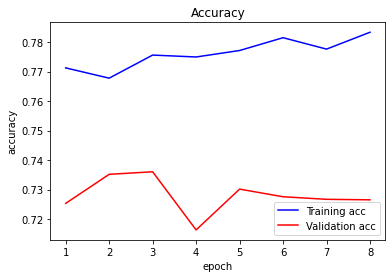

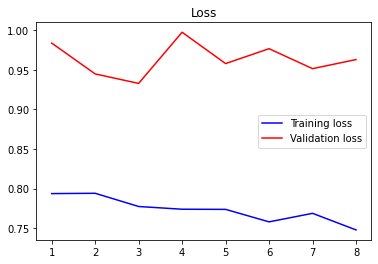

In [ ]:
#setting ModelCheckpoint
checkpoint_dir = os.getcwd()+"/model"
os.makedirs(checkpoint_dir, exist_ok=True)
#checkpoint = ModelCheckpoint(filepath=checkpoint_dir+"/"+"weight_1.hdf5",
#                            monitor='loss',
 #                           mode='min',
  #                          save_best_only=True)
import keras
my_model = keras.models.load_model('best_model.h5')

#compiling
optimizer = Adam(lr=0.0001)
loss = "categorical_crossentropy"

my_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=5),
             ModelCheckpoint(filepath=checkpoint_dir+"/"+'best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]


#keras_model_best = keras.models.load_model('best_model.h5')

#training
history = my_model.fit_generator(train_generator,
                                 steps_per_epoch=len(train_generator),
                                 epochs=epochs,
                                 validation_data=val_generator, 
                                 validation_steps=len(val_generator),
                                 callbacks=callbacks) #early stopping 집어넣기



#visualizing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
 
#plt.show()
#2시간 28분 걸림

### 학습 결과 확인하기

In [ ]:
# 모델 불러오기

import os
from keras.models import load_model

checkpoint_dir = os.getcwd()+"/model/"
model = load_model(checkpoint_dir+"best_model.h5")
model.save_weights("./model/0823_1930")

model.summary()

In [ ]:
# test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
import matplotlib.pyplot as plt
import natsort
%matplotlib inline

targetx = 224
targety = 224

test_dir = os.getcwd()+"/img/splitfolders/test/블랙핑크 제니/"
label_dir = os.getcwd()+"/img/label/"
class_list = os.listdir(train_dir)
class_list = natsort.natsorted(class_list)
print(class_list)

image_path = []
for i in os.listdir(test_dir):
    test_image_name = test_dir + i
    image_path.append(test_image_name)  

for image in image_path:
    img = Image.open(image)
    img = img.convert("RGB")
    img = img.resize((targetx,targety))    
    data = np.asarray(img)
    X = np.array(data)
    X = X.astype("float") / 256
    X = X.reshape(-1, targetx, targety,3)
    categories = class_list
    pred = model.predict(X)
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0])))
    plt.imshow(img)
    plt.show()